# Statistics Project - Assignment 2

Gur Keinan, 213635899

Naomi Derel, 325324994

## From the Previous Assignment

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

np.random.seed(1012)

data = pd.read_csv('CVD_cleaned.csv')

# transformation 1:
data.loc[data["Diabetes"] ==
         'No, pre-diabetes or borderline diabetes', "Diabetes"] = 'at risk'
data = data[data["Diabetes"] != 'Yes, but female told only during pregnancy']

# transformation 2:
data["Numerical_Age_Category"] = data["Age_Category"].apply(
    lambda x: int(x[:2]))


**Research Question:** Does the value of green vegetables' consumption differ between populations which do and don't exercise?

## Question 1 - Estimation

### A

In [28]:
# Get the data for Green_Vegetables_Consumption for people who exercise and who don't:
population_exercise = data[data["Exercise"] ==
                           "Yes"]["Green_Vegetables_Consumption"].to_numpy()
population_wo_exercise = data[data["Exercise"] ==
                              "No"]["Green_Vegetables_Consumption"].to_numpy()


In [29]:
# Calculate the mean of the population:
population_mean_exercise = np.mean(population_exercise)
population_mean_wo_exercise = np.mean(population_wo_exercise)

print("Mean of population with exercise: " + str(population_mean_exercise))
print("Mean of population without exercise: " +
      str(population_mean_wo_exercise))


Mean of population with exercise: 16.106796280143772
Mean of population without exercise: 11.629843076342416


### B

We know that the mean is asymptotically normal under the assumption that the observations are iid.
The variance of a mean is the variance of the distribution divided by n. We can estimate the variance using the population variance.

In [30]:
def CI_builder(population: np.ndarray, conf_level: float) -> tuple[float, float]:
    """
    This function calculates the confidence interval of a population with a given confidence level.
    We assume that the mean is asymptotically normal distributed.

    :param population: ndarray of the population
    :param conf_level: confidence level
    :return: confidence interval
    """

    population_mean = np.mean(population)
    population_std = np.std(population)

    z_score = stats.norm.ppf(1-((1-conf_level)/2))
    margin_of_error = z_score * (population_std / np.sqrt(len(population)))
    confidence_interval = (population_mean - margin_of_error,
                           population_mean + margin_of_error)
    return confidence_interval


In [31]:
ci_exercise = CI_builder(population_exercise, 0.95)
print("CI for exercising population: ", ci_exercise)


CI for exercising population:  (16.045785445786848, 16.167807114500697)


In [32]:
ci_wo_exercise = CI_builder(population_wo_exercise, 0.95)
print("CI for non-exercising population: ", ci_wo_exercise)


CI for non-exercising population:  (11.52951117003532, 11.730174982649512)


### C

We can see the CI are not overlapping. Therefore, we can say with a high confidence level that the expectations of the 2 categories differ.

## Question 2 - Hypothesis Tests

### A

Let $\mu_1$ be the expectations of the vegetable consumption among people who exercise.

Let $\mu_2$ be the expectations of the vegetable consumption among people who do not exercise.

H0 : $\mu_1 = \mu_2$

H1 : $\mu_1 \neq \mu_2$


### B

The assumptions of a T test are:

1. the observations are independent.
2. the data is (approximately) normally distributed.
3. the variances of the two groups are identical.

We will show which assumptions hold and which don't.

1. We can assume the first assumption is correct, since from the description we think the survey took place by multinomial sampling.

2. For the second assumption, we will look at the histograms of the two populations:

Text(0.5, 1.0, 'Green Vegetables Consumption amongst exercising population histogram')

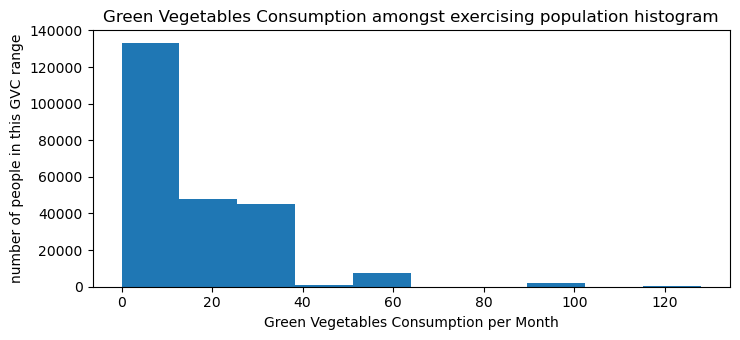

In [33]:
# Plot histogram for exercising population:
plt.hist(population_exercise)
plt.xlabel("Green Vegetables Consumption per Month")
plt.ylabel("number of people in this GVC range")
plt.title("Green Vegetables Consumption amongst exercising population histogram")


Text(0.5, 1.0, 'Green Vegetables Consumption amongst not exercising population histogram')

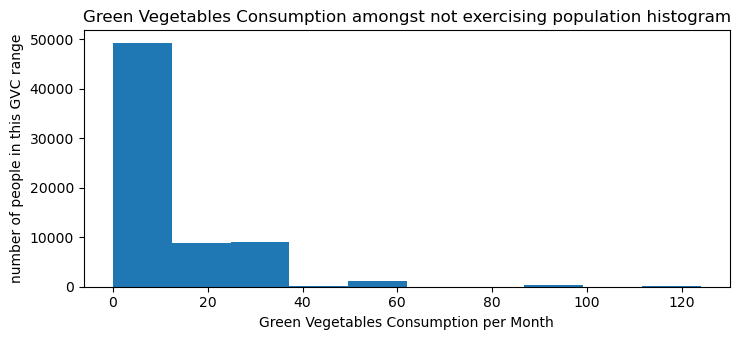

In [34]:
# Plot histogram for non-exercising population:
plt.hist(population_wo_exercise)
plt.xlabel("Green Vegetables Consumption per Month")
plt.ylabel("number of people in this GVC range")
plt.title("Green Vegetables Consumption amongst not exercising population histogram")


From the histograms, the data does not appear to be normally distributed (for either of the populations or for their combination).

3. For the third assumption, we will compare the variances of the populations using an F test:

Let $\sigma_1$ be the variance of the vegetable consumption among people who exercise.

Let $\sigma_2$ be the variance of the vegetable consumption among people who don't exercise.

H0 : $\sigma_1 = \sigma_2$

H1 : $\sigma_1 \neq \sigma_2$

T.S : F

R.R : F > $F_{(n-1, m-1), 0.05}$

In [35]:
n = len(population_exercise)
m = len(population_wo_exercise)

# calculate the estimated variance of the two samples:
S1 = 1/(n-1) * np.sum((population_exercise - np.mean(population_exercise))**2)
S2 = 1/(m-1) * np.sum((population_wo_exercise -
                       np.mean(population_wo_exercise))**2)

# calculate the F Statistic:
if S1 > S2:
    F = S1/S2
else:
    F = S2/S1
print("F = ", F)

# Calculate the f-score for 95% confidence interval:
f_score = stats.f.ppf(q=1-0.05, dfn=n-1, dfd=m-1)
print("f_score = ", f_score)

# Compare the F Statistic to the F critical value:
if F > f_score:
    print("Reject H0")
else:
    print("Accept H0")


F =  1.2738850004789826
f_score =  1.0101346067289187
Reject H0


Therefore, the variances are not identical with a high confidence level.

**In conclusion, the assumptions of the T test are not met.**

### C

We will preform the following T test:

H0 : $\mu_1 - \mu_2 = 0$

H1 : $\mu_1 - \mu_2 \neq 0$

T.S : T

R.R : |T| > $t_{(n+m-2), 0.05/2}$

In [36]:
n = len(population_exercise)
m = len(population_wo_exercise)

# Calculate the estimated variance of the two samples:
S1 = 1/(n-1) * np.sum((population_exercise - np.mean(population_exercise))**2)
S2 = 1/(m-1) * np.sum((population_wo_exercise -
                       np.mean(population_wo_exercise))**2)

# Calculate the pooled standard deviation:
Sp = np.sqrt(((n-1)*S1 + (m-1)*S2)/(n+m-2))

# Calculate the T statistic:
T = (np.mean(population_exercise) - np.mean(population_wo_exercise)) / \
    (Sp*np.sqrt(1/n + 1/m))
print("|T|: ", np.abs(T))

# Calculate the t-score for 95% confidence interval:
t_score = stats.t.ppf(1-0.05/2, n+m-2)
print("t_score = ", t_score)

# Compare the T statistic to the T critical value:
if np.abs(T) > t_score:
    print("Reject H0")
else:
    print("Accept H0")


|T|:  69.92758750340428
t_score =  1.9599717318750112
Reject H0


With a confidence level of 0.95 we reject the null hypothesis.

### D

We will preform the following Wald test:

H0 : $\mu_1 - \mu_2 = 0$

H1 : $\mu_1 - \mu_2 \neq 0$

T.S : W

R.R : |W| > $Z_{(0.05)/2}$

In [37]:
n = len(population_exercise)
m = len(population_wo_exercise)

# Calculate the estimated variance of the two samples:
S1 = 1/(n-1) * np.sum((population_exercise - np.mean(population_exercise))**2)
S2 = 1/(m-1) * np.sum((population_wo_exercise -
                       np.mean(population_wo_exercise))**2)

# Calculate the W statistic:
W = (np.mean(population_exercise) -
     np.mean(population_wo_exercise))/(np.sqrt(S1/n + S2/m))
print("|W| = ", np.abs(W))

# Calculate the z-score for 95% confidence interval:
z_score = stats.norm.ppf(1-0.05/2)
print("z_score = ", z_score)

# Compare the W statistic to the z-score:
if np.abs(W) > z_score:
    print("Reject H0")
else:
    print("Accept H0")


|W| =  74.7247810897999
z_score =  1.959963984540054
Reject H0


With a confidence level of 0.95 we reject the null hypothesis.

### E

In [38]:
print(f"The T.S of the T test is: {T:.4f}")
print(f"The threshold of the T test is: {t_score:.2f}")
p_value_T = 2 * (stats.t.cdf(-np.abs(T), df=n+m-2))
print("p-value for T's test is: " + str(p_value_T))

print()

print(f"The T.S of the Wald test is: {W:.4f}")
print(f"The threshold of the Wald test is: {z_score:.2f}")
p_value_wald = 2 * (stats.norm.cdf(-np.abs(W)))
print("p-value for Wald's test is: " + str(p_value_wald))


The T.S of the T test is: 69.9276
The threshold of the T test is: 1.96
p-value for T's test is: 0.0

The T.S of the Wald test is: 74.7248
The threshold of the Wald test is: 1.96
p-value for Wald's test is: 0.0


In [39]:
n = len(population_exercise)
m = len(population_wo_exercise)
print("n = ", n)
print("m = ", m)


n =  237321
m =  68887


The test statistics are both significantly bigger than the thresholds to reject H0.
The p-value's of both tests are 0.

Note: in our case, the population sizes are very large which might cause a decrease in the p-value artificially. 

### F

We will preform the following Log-Likelihood test:

H0 : $\mu_1 - \mu_2 = 0$

H1 : $\mu_1 - \mu_2 \neq 0$

T.S : $\lambda$

R.R : $\lambda$ > $\chi^2_{(0.05)/2}$

In [40]:
n = len(population_exercise)
m = len(population_wo_exercise)
N = n+m

# Calculate the mean of the two populations:
mean1 = np.mean(population_exercise)
mean2 = np.mean(population_wo_exercise)

# Calculate the estimated variance of the two populations:
S1 = 1/(n-1) * np.sum((population_exercise - mean1)**2)
S2 = 1/(m-1) * np.sum((population_wo_exercise - mean2)**2)
Sp = np.sqrt(((n-1)*S1 + (m-1)*S2)/(n+m-2))

# Calculate the estimated variance of the entire population:
all_population = np.concatenate((population_exercise, population_wo_exercise))
var = 1/(N-1) * np.sum((all_population - np.mean(all_population))**2)

# L1 = 1/np.sqrt(2*np.pi*Sp**2)**N * np.exp(-np.sum((population_exercise - mean1)**2)/(2*Sp**2)) * np.exp(-np.sum((population_wo_exercise - mean2)**2)/(2*Sp**2))
# L2 = 1/np.sqrt(2*np.pi*var)**N * np.exp(-np.sum((all_population - np.mean(all_population))**2)/(2*var))

# Calculate the log likelihood to avoid overflow:
# Two populations separately:
logL1 = -N/2 * np.log(2*np.pi*Sp**2) - np.sum((population_exercise - mean1)**2) / \
    (2*Sp**2) - np.sum((population_wo_exercise - mean2)**2)/(2*Sp**2)
# All population:
logL2 = -N/2 * np.log(2*np.pi*var) - \
    np.sum((all_population - np.mean(all_population))**2)/(2*var)

# Calculate the lambda from the log likelihood:
lam = 2*(logL1 - logL2)
print("Lambda: ", lam)

# There is 1 free parameter in the theta space and 0 in the theta0 space. Therefore, the degree of freedom is 1.
score_chi = stats.chi2.ppf(0.95, 1)
print("Chi score: ", score_chi)

# Compare the lambda and chi score:
if lam > score_chi:
    print("Reject H0")
else:
    print("Do not reject H0")


Lambda:  4851.266266766004
Chi score:  3.841458820694124
Reject H0


With a confidence level of 0.95 we reject the null hypothesis.

## Question 3 - Different Sample Sizes

### A

In [41]:
# Sample different samples from the population:

selected_columns = ["Green_Vegetables_Consumption", "Exercise"]
all_population = data[selected_columns]

samples_list = []
for i in [30, 50, 100, 500]:
    samples_list.append(all_population.sample(i))


### B

In [42]:
def CI_builder(population: np.ndarray, conf_level: float) -> tuple[float, float]:
    """
    This function calculates the confidence interval of a population with a given confidence level.
    We assume that the mean is asymptotically normal distributed.

    :param population: ndarray of the population
    :param conf_level: confidence level
    :return: confidence interval
    """

    population_mean = np.mean(population)
    population_std = np.std(population)

    z_score = stats.norm.ppf(1-((1-conf_level)/2))
    margin_of_error = z_score * (population_std / np.sqrt(len(population)))
    confidence_interval = (population_mean - margin_of_error,
                           population_mean + margin_of_error)
    return confidence_interval


In [43]:
# Calculate confidence intervals for the mean of green vegetables consumption for each sample:

for sample in samples_list:
    print("Sample size: ", len(sample))

    # from the sample, extract the green vegetables consumption for people who exercise and for people who don't exercise:
    sample_exercise = sample[sample['Exercise'] ==
                             'Yes']["Green_Vegetables_Consumption"].to_numpy()
    sample_wo_exercise = sample[sample['Exercise'] ==
                                'No']["Green_Vegetables_Consumption"].to_numpy()

    # Build the confidence intervals:
    ci_gvc_exercise = CI_builder(sample_exercise, 0.95)
    ci_gvc_wo_exercise = CI_builder(sample_wo_exercise, 0.95)

    print("CI for the mean for people who exercise: ", ci_gvc_exercise)
    print("CI for the mean GVC for people who don't exercise: ", ci_gvc_wo_exercise)
    print()


Sample size:  30
CI for the mean for people who exercise:  (10.23617874889943, 20.003821251100568)
CI for the mean GVC for people who don't exercise:  (1.1598458627347519, 20.44015413726525)

Sample size:  50
CI for the mean for people who exercise:  (12.887216718017674, 25.69814913564086)
CI for the mean GVC for people who don't exercise:  (0.08453054238925972, 39.4710250131663)

Sample size:  100
CI for the mean for people who exercise:  (11.699772934189733, 17.287568837962166)
CI for the mean GVC for people who don't exercise:  (6.511806852369333, 13.392955052392573)

Sample size:  500
CI for the mean for people who exercise:  (16.124523976048877, 19.170476023951124)
CI for the mean GVC for people who don't exercise:  (9.641651141682441, 15.47834885831756)



**Results from question 1:**

CI for exercising population:  (16.045785445786848, 16.167807114500697)

CI for non-exercising population:  (11.52951117003532, 11.730174982649512)

**Comparison:**

The CI size decreases as the sample size grows. The CI's from question 1 are contained within the CI's from the samples (excluding the exercise CI with sample size 500 which has a slightly off lower bound), and much smaller.

In conclusion, the CI's seem to be generally converging to the CI's from question 1.



### C

In [44]:
def Wald_Test(population1, population2, conf_level):
    """
    Preform a Wald Test for two populations with confidence level conf_level. Print out the results.

    :param population1: First population
    :param population2: Second population
    :param conf_level: Confidence level
    """
    n = len(population1)
    m = len(population2)

    # Calculate the estimated variance of the two populations:
    S1 = 1/(n-1) * np.sum((population1 - np.mean(population1))**2)
    S2 = 1/(m-1) * np.sum((population2 - np.mean(population2))**2)

    # Calculate the Wald Statistic:
    W = (np.mean(population1) - np.mean(population2))/(np.sqrt(S1/n + S2/m))
    print(f"|W| = {np.abs(W):.4f}")

    # Calculate the z-score:
    z_score = stats.norm.ppf(1-((1-conf_level)/2))
    print(f"z_score = {np.abs(z_score):.2f}")

    # Compare the Wald Statistic to the z-score:
    if np.abs(W) > z_score:
        print("Reject H0")
    else:
        print("Accept H0")

    # Calculate the p-value using the equation from the lecture:
    p_value_wald = 2 * (stats.norm.cdf(-np.abs(W)))
    print(f"p-value: {p_value_wald:.4f}")


In [45]:
# Preform the Wald test for the difference between the mean of two groups on the samples:

for sample in samples_list:
    print("Sample size: ", len(sample))

    sample_exercise = sample[sample['Exercise'] ==
                             'Yes']["Green_Vegetables_Consumption"].to_numpy()
    sample_wo_exercise = sample[sample['Exercise'] ==
                                'No']["Green_Vegetables_Consumption"].to_numpy()

    Wald_Test(sample_exercise, sample_wo_exercise, 0.95)
    print()


Sample size:  30
|W| = 0.7130
z_score = 1.96
Accept H0
p-value: 0.4758

Sample size:  50
|W| = 0.0435
z_score = 1.96
Accept H0
p-value: 0.9653

Sample size:  100
|W| = 1.9738
z_score = 1.96
Reject H0
p-value: 0.0484

Sample size:  500
|W| = 3.0163
z_score = 1.96
Reject H0
p-value: 0.0026



**Result from question 2:**

|W| =  74.7247810897999

z_score =  1.959963984540054

Reject H0

p-value for Wald's test is: 0.0

**Comparison:**

The W Statistics are much smaller with a smaller sample size, but starting from 100 they are enough to reject the null hypothesis with a confidence level of 0.95.


### D 

In [46]:
def get_pvalue(population1, population2, conf_level):
    """
    Preform a wald test on two populations and return the p-value.
    :param population1: first population
    :param population2: second population
    :param conf_level: confidence level
    """
    n = len(population1)
    m = len(population2)

    # Calculate the estimated sample variance:
    S1 = 1/(n-1) * np.sum((population1 - np.mean(population1))**2)
    S2 = 1/(m-1) * np.sum((population2 - np.mean(population2))**2)

    # Calculate the Wald Statistic:
    W = (np.mean(population1) - np.mean(population2))/(np.sqrt(S1/n + S2/m))
    # Calculate the z-score:
    z_score = stats.norm.ppf(1-((1-conf_level)/2))

    # Calculate the p-value:
    p_value_wald = 2 * (stats.norm.cdf(-np.abs(W)))
    return p_value_wald


In [47]:
# Repeat the previous steps 100 times:

iter_num = 100
selected_columns = ["Green_Vegetables_Consumption", "Exercise"]
all_population = data[selected_columns]
sizes_list = [30, 50, 100, 500]

# Create empty lists to save the results:
conf_intervals_exercise_list = [[] for _ in range(len(sizes_list))]
conf_intervals_wo_exercise_list = [[] for _ in range(len(sizes_list))]
pvalue_list = [[] for _ in range(len(sizes_list))]

# Calculate the population mean:
population_mean_exercise = np.mean(population_exercise)
population_mean_wo_exercise = np.mean(population_wo_exercise)

# Repeat the steps for each sample size:
for i, size in enumerate(sizes_list):
    print("Sample size: ", size)

    exercise_in_ci_count = 0
    wo_exercise_in_ci_count = 0

    for _ in range(iter_num):
        # Sample from the population, make sure that there are samples in both groups (avoid division by zero):
        while True:
            sample = all_population.sample(n=size)
            sample_exercise = sample[sample['Exercise'] ==
                                     'Yes']["Green_Vegetables_Consumption"].to_numpy()
            sample_wo_exercise = sample[sample['Exercise'] ==
                                        'No']["Green_Vegetables_Consumption"].to_numpy()
            if len(sample_exercise) > 1 and len(sample_wo_exercise) > 1:
                break

        # Calculate the CI and p-value for each group:
        ci_gvc_exercise = CI_builder(sample_exercise, 0.95)
        ci_gvc_wo_exercise = CI_builder(sample_wo_exercise, 0.95)
        pvalue = get_pvalue(sample_exercise, sample_wo_exercise, 0.95)

        # Save the results:
        conf_intervals_exercise_list[i].append(
            ci_gvc_exercise[1] - ci_gvc_exercise[0])
        conf_intervals_wo_exercise_list[i].append(
            ci_gvc_wo_exercise[1] - ci_gvc_wo_exercise[0])
        pvalue_list[i].append(pvalue)

        # Check if the population mean is in the CI:
        if ci_gvc_exercise[0] <= population_mean_exercise <= ci_gvc_exercise[1]:
            exercise_in_ci_count += 1
        if ci_gvc_wo_exercise[0] <= population_mean_wo_exercise <= ci_gvc_wo_exercise[1]:
            wo_exercise_in_ci_count += 1

    print("percentage of the times when the mean is in the CI of the sample with exercise: ",
          (exercise_in_ci_count/iter_num)*100, "%")
    print("percentage of the times when the mean is in the CI of the sample without exercise: ",
          (wo_exercise_in_ci_count/iter_num)*100, "%")

    print()


Sample size:  30


percentage of the times when the mean is in the CI of the sample with exercise:  86.0 %
percentage of the times when the mean is in the CI of the sample without exercise:  72.0 %

Sample size:  50
percentage of the times when the mean is in the CI of the sample with exercise:  93.0 %
percentage of the times when the mean is in the CI of the sample without exercise:  82.0 %

Sample size:  100
percentage of the times when the mean is in the CI of the sample with exercise:  94.0 %
percentage of the times when the mean is in the CI of the sample without exercise:  91.0 %

Sample size:  500
percentage of the times when the mean is in the CI of the sample with exercise:  95.0 %
percentage of the times when the mean is in the CI of the sample without exercise:  96.0 %



The percentages get closer to 95 percent along with an increasing sample size.

#### CI Length Results:

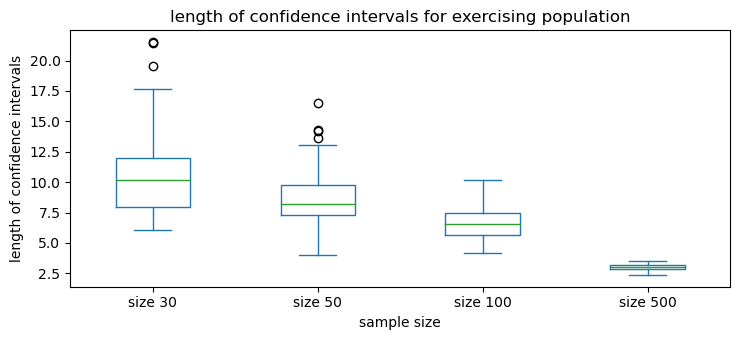

In [48]:
# Plotting for exercise population:

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

box_data = pd.DataFrame({"size 30": conf_intervals_exercise_list[0], "size 50": conf_intervals_exercise_list[1],
                        "size 100": conf_intervals_exercise_list[2], "size 500": conf_intervals_exercise_list[3]})

ax = box_data[["size 30", "size 50", "size 100", "size 500"]].plot(
    kind='box', title='length of confidence intervals for exercising population')
ax.set_xlabel("sample size")
ax.set_ylabel("length of confidence intervals")
plt.show()


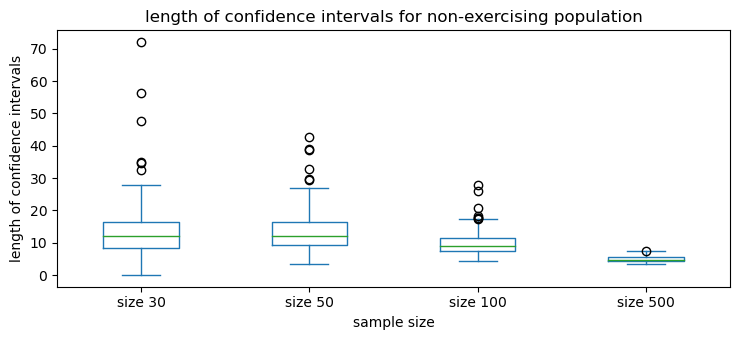

In [49]:
# Plotting for non exercising population:

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
box_data = pd.DataFrame({"size 30": conf_intervals_wo_exercise_list[0], "size 50": conf_intervals_wo_exercise_list[1],
                        "size 100": conf_intervals_wo_exercise_list[2], "size 500": conf_intervals_wo_exercise_list[3]})

ax = box_data[["size 30", "size 50", "size 100", "size 500"]].plot(
    kind='box', title='length of confidence intervals for non-exercising population')
ax.set_xlabel("sample size")
ax.set_ylabel("length of confidence intervals")
plt.show()


In both populations, the mean length and the IQR decrease with the increase of the sample size. 

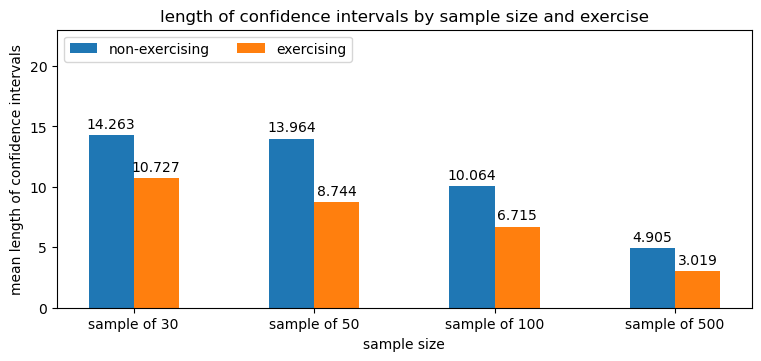

In [50]:
# Plotting a shared barplot for the 2 categories:

sizes = tuple(("sample of " + str(size)) for size in sizes_list)
populations_means = {
    'non-exercising': tuple([round(np.mean(conf_intervals_wo_exercise_list[i]), 3) for i in range(len(conf_intervals_wo_exercise_list))]),
    'exercising': tuple([round(np.mean(conf_intervals_exercise_list[i]), 3) for i in range(len(conf_intervals_exercise_list))])
}

x = np.arange(len(sizes))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0.5

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in populations_means.items():
    offset = width * multiplier
    rect = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rect, padding=3)
    multiplier += 1

ax.set_ylabel('mean length of confidence intervals')
ax.set_xlabel('sample size')
ax.set_title('length of confidence intervals by sample size and exercise')
ax.set_xticks(x + width, sizes)
ax.legend(loc='upper left', ncols=2)
ax.set_ylim(0, 23)

plt.show()


The mean length of the exercising population is smaller than the non-exercising for all sample sizes. This is likely caused by the differences in the population sizes - the exercising population is larger so the samples consist on average of more exercising than non-exercising.

#### P-value Results:

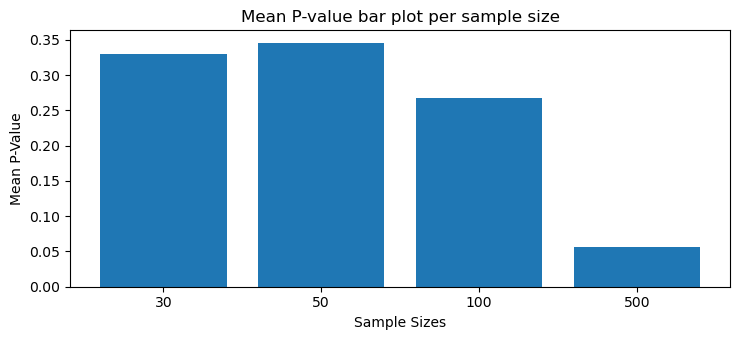

In [51]:
# Plotting a p-value barplot:

pvalue_mean = [np.mean(pvalue_list[i]) for i in range(len(pvalue_list))]
plt.bar(["30", "50", "100", "500"], pvalue_mean)
plt.xlabel("Sample Sizes")
plt.ylabel("Mean P-Value")
plt.title("Mean P-value bar plot per sample size")
plt.show()


The p-value results decrease with the sample size, most notably between 100 and 500 which is also the largest increase in the size.